In [1]:
# Import the require libraries
%matplotlib inline

import math
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup the variables

windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

In [3]:
# read in the data using the yahoo finance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name, start="2022-01-01", end="2022-12-31")

Enter ticker of your choice jpm


[*********************100%***********************]  1 of 1 completed


In [4]:
# create a function to compute realized volatility 

def realized_vol(price_data, window=30):

    log_return = (price_data["Close"] / price_data["Close"].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

In [5]:
# loop through each of the windows and compute realized volatility over each time frame. 
# estimator is a pandas DataFrame. That’s why it’s so easy so compute the min, max, median, and quantiles

for window in windows:
    
    # get a dataframe with realized volatility
    estimator = realized_vol(window=window, price_data=data)
    
    # append the summary stats to a list
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

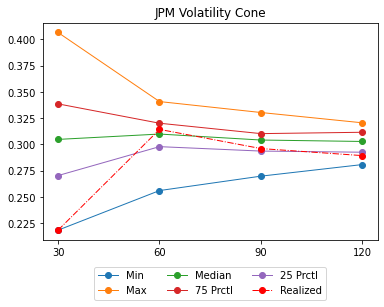

In [6]:
# create the plots on the chart
# The first 6 lines create the lines on the chart. The other two align the x-axis labels and format the legend.

plt.plot(windows, min_, "-o", linewidth=1, label="Min")
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

# set the x-axis labels
plt.xticks(windows)

# format the legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

# display the title
plt.title(f"{name} Volatility Cone")

# Save the figure.
# plt.savefig("./Images/volatilityCone.jpg")

# show the figure
plt.show()


# Analyze the results

The y-axis is the realized volatility over each time frame. The x-axis is time frame we use to compute the realized volatility.

There are three conclusions you can draw from this chart:

Over the 30-day window, there is a spike in realized volatility. Realized volatility spikes usually correspond to a drop in the stock price. This should tell us to explore the stock price to see what happened.
Realized volatility (the dashed line) is close to the lowest it’s been across all time frames. This is a data point to support a case to get long volatility (i.e. options are cheap).
Realized volatility is mean reverting. You can see this in the cone shape of the chart. This is a data point to support a case to get long volatility.